<a href="https://colab.research.google.com/github/yasmim-silva/Lista-de-Tarefas/blob/main/03_Introdu%C3%A7%C3%A3o_a_NetworkX_Exerc%C3%ADcios_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório

**Teoria dos Grafos**

Prof<sup>a</sup> Patrícia D. L. Machado

UFCG – Unidade Acadêmica de Sistemas e Computação



Este notebook apresenta, exercícios introdutórios usando o pacote NetworkX
cuja documentação encontra-se no link abaixo:

https://networkx.org/documentation/stable/reference/index.html

Para a compreensão deste notebook é **fundamental estudar previamente os notebooks das aulas anteriores**, cujos links estão disponíveis nos materiais de aula no Google Classroom.

> <font face="Monospace" size=2>
O bloco de código abaixo instala pacotes utilizados neste notebook. No menu principal, clique em `Ambiente de Execução` -> `Executar tudo` para (re-)carregar as imagens utilizadas neste notebook, se necessário. Para (re-)inicializar todo o notebook, limpando os dados atuais, selecione, no menu principal, `Ambiente de Execução` -> `Desconectar e excluir ambiente de execução`.
</font>

In [1]:
# @title  { display-mode: "form" }
!git clone https://github.com/pdlmachado/gtufcg.git
!pip install parameterized
import networkx as nx
# Pacotes auxiliares
import unittest
from parameterized import parameterized
import matplotlib.pyplot as plt
from gtufcg.util.draw_util import draw_graph
from gtufcg.util.import_util import read_multiple_CSV

Cloning into 'gtufcg'...
remote: Enumerating objects: 1206, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 1206 (delta 21), reused 0 (delta 0), pack-reused 1169 (from 3)
Receiving objects: 100% (1206/1206), 1.90 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (801/801), done.


# Exercícios

Considere que está desenvolvendo um aplicativo para uma rede social onde as informações são modeladas usando um grafo. No grafo, as pessoas são representadas por vértices e as arestas entre duas pessoas representam que estas pessoas são amigas.
As pessoas possuem dois atributos: o nome e a cidade onde vivem. As arestas possuem como atributo o ano em que a amizade começou na rede.

### (1)

Construa um exemplo deste grafo para teste.

* O grafo deve ter pelo menos 5 pessoas.
* Os atributos dos vértices são `nome` e `cidade`
* Toda aresta possui o atributo `ano`
* Pelo menos uma pessoa não deve ter amigo
* O grafo deve ter, no mínimo, 4 relações de amizade
* O grafo deve ter pessoas de pelo menos duas cidades diferentes.

A figura abaixo mostra um exemplo deste grafo.

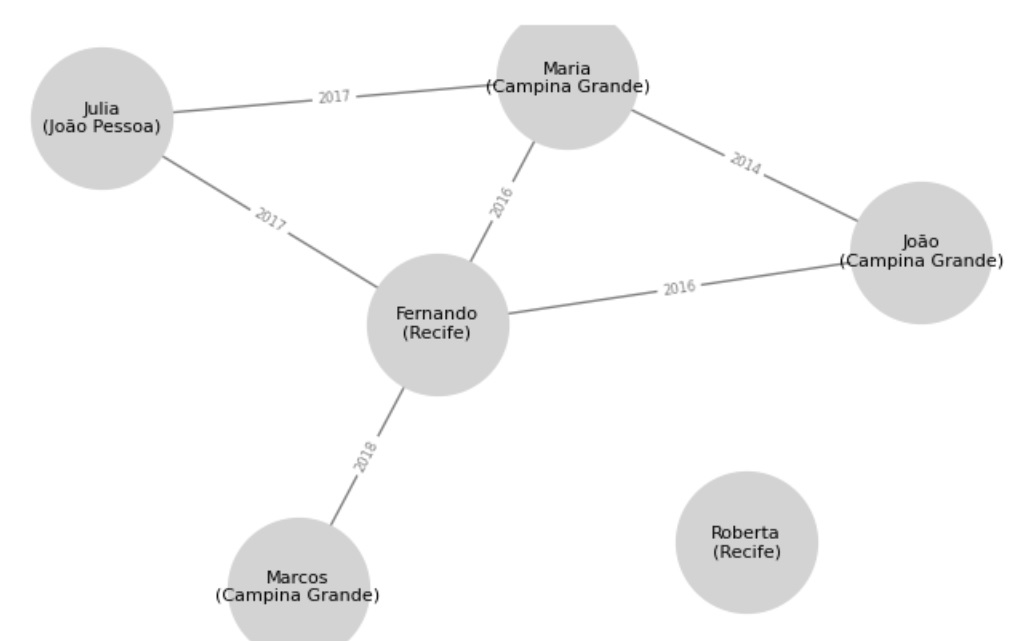

In [2]:
# @title
from IPython.display import Image
Image('gtufcg/image/TG03-Lab1.jpg',width=800)

In [3]:
R = nx.Graph()

# Escreva aqui o seu código
R.add_node(0,nome ='João', cidade='Campina Grande')
R.add_node(1,nome ='Maria', cidade='Campina Grande')

R.add_edge(0,1,ano="2014")


print(R.nodes)
print(R.nodes(data=True))
print(R.edges)
print(R.edges(data=True))

[0, 1]
[(0, {'nome': 'João', 'cidade': 'Campina Grande'}), (1, {'nome': 'Maria', 'cidade': 'Campina Grande'})]
[(0, 1)]
[(0, 1, {'ano': '2014'})]


In [4]:
# Testes
assert R.number_of_nodes() >= 5
assert R.number_of_edges() >= 4
assert len(set(nx.get_node_attributes(R,'cidade').values())) >= 2
assert R.number_of_nodes()==len(nx.get_node_attributes(R,'nome'))
assert R.number_of_nodes()==len(nx.get_node_attributes(R,'cidade'))
assert R.number_of_edges()==len(nx.get_edge_attributes(R,'ano'))

AssertionError: 

### (2)

Construa uma função que recebe como parâmetro o nome de uma pessoa e determina quantos amigos esta pessoa tem.

In [ ]:
def conta_amigos (nome):
  # Escreva seu código aqui
  return None

In [ ]:
# Testes para a função conta_amigos
assert all(len(R[n])==conta_amigos(R.nodes[n]['nome']) for n in R.nodes)

### (3)

Construa uma função recebe o nome de uma pessoa e retorna um dicionário cujas chaves são o nome de uma cidade e o valor é a lista de amigos da pessoa que moram na cidade. O dicionário deve conter apenas as cidades nas quais existam amigos da pessoa.

In [ ]:
def amigos_mesma_cidade (nome):
  # Escreva seu código aqui
  return []


print(amigos_mesma_cidade('Fernando'))


In [ ]:
# Testes
sao_amigos = lambda a,b: any(any(R.has_edge(n,m) and R.nodes[m]['nome']==b for m in R.neighbors(n)) for n in R.nodes if R.nodes[n]['nome']==a)
mora_na_cidade = lambda a,c: any(R.nodes[n]['cidade']==c for n in R.nodes if R.nodes[n]['nome']==a)
nomes = [R.nodes[n]['nome'] for n in R.nodes]
# Cidades retornadas são válidas
assert all(c in nx.get_node_attributes(R,'cidade').values() for n in nomes for c in amigos_mesma_cidade(n).keys())
# Amigos retornados são realmente amigos
assert all(sao_amigos(a,n) for n in nomes for c,amigos in amigos_mesma_cidade(n).items() for a in amigos)
# Amigos retornados moram na cidade indicada
assert all(mora_na_cidade(a,c) for n in nomes for c,amigos in amigos_mesma_cidade(n).items() for a in amigos)
# São retornadas apenas cidades onde existe pelo menos um amigo
assert all(not amigos==[] for n in nomes for amigos in amigos_mesma_cidade(n).values())

### (4)
Construa uma função que retorne uma lista com o(s) amigo(s) mais antigo(s) de uma pessoa na rede social. Para tal, a função deve considerar o ano mais remoto de início de amizade e retornar todas as amizades que iniciaram naquele ano. Caso a pessoa não tenha amigos, a função deve retornar a lista vazia.

In [ ]:
def amigo_mais_antigo (nome):
  # Escreva seu código aqui
  return None

print(amigo_mais_antigo('Fernando'))

In [ ]:
# Testes
menor_data = lambda n:(min([R[x][y]['ano'] for x,y in R.edges if x == n or y == n]))
id = lambda n: list(filter(lambda x: R.nodes[x]['nome']==n, R.nodes))[0]
# Retorna um subgrupo de amigos
assert all(len(R[n])>=len(amigo_mais_antigo(R.nodes[n]['nome'])) for n in R.nodes)
# Subgrupo retornado teve amizade iniciada no ano mais remoto
assert all(menor_data(n)==R[n][id(a)]['ano'] for n in R.nodes for a in amigo_mais_antigo(R.nodes[n]['nome']))

### (5)

Escreva uma função, `graph_types`, que classifica um grafo não-direcionado, considerando as seguintes categorias:

     Simples, Multigrafo, Pseudografo, Trivial, Nulo.

 Um mesmo grafo pode possuir mais de uma destas características.
 Por exemplo, o grafo Trivial é também um grafo Simples.

 A função deve retornar uma lista com todas as classificações que podem ser
 dadas ao grafo recebido como parâmetro, em qualquer ordem.

 Dicas:
  *  Use o método `number_of_edges` da classe `Graph` para determinar a quantidade de arestas  entre dois vértices (ver exercícios resolvidos Aula 02)
  *  Use a função `number_of_selfloops` da seção `Functions` de NetworkX para determinar se o grafo possui loops
  * Use a função `has_parallel_edges` apresentada no notebook da Aula 02



In [ ]:
#@title  { run: "auto", vertical-output: true }
filename5 = "s-u-cy-sc-p-b-01.graphml" #@param ["m-u-cy-sc-p-01.graphml", "p-u-cy-sc-p-ch-01.graphml", "s-u-cy-sc-p-01.graphml", "s-u-cy-sc-p-05.graphml", "s-u-a-sc-p-t-b-03.graphml", "s-u-cy-sc-p-06.graphml", "s-u-cy-sc-p-b-01.graphml", "s-u-cy-sc-p-03.graphml", "K3-3.graphml", "K1.graphml", "Cycle6.graphml", "Empty6.graphml", "K0.graphml"]
layout5 = "kamada_kawai_layout" #@param ["circular_layout", "kamada_kawai_layout", "planar_layout", "random_layout", "shell_layout", "spring_layout", "spectral_layout", "spiral_layout"]

def has_parallel_edges (G):
  for u in G.nodes:
    for v in G.nodes:
      if G.number_of_edges(u,v) > 1:
        return True
  return False

def graph_types (G):
  # Escreva aqui o seu código
  return []


G5 = nx.read_graphml("gtufcg/graphs/"+filename5)
draw_graph(G5,layoutid=layout5)
print(graph_types(G5))


### Testes Automáticos

In [ ]:
# Testes Automáticos para a função graph_types
from collections import Counter
assert Counter(graph_types(nx.Graph())) == Counter(["Nulo","Simples"])
assert Counter(graph_types(nx.trivial_graph())) == Counter(["Simples","Trivial"])
assert Counter(graph_types(nx.Graph([(0,0)]))) == Counter(["Pseudografo"])
assert Counter(graph_types(nx.MultiGraph([(0,1),(1,0)]))) == Counter(["Multigrafo"])
assert Counter(graph_types(nx.Graph([(0,1),(1,2)]))) == Counter(["Simples"])
assert Counter(graph_types(nx.path_graph(8))) == Counter(["Simples"])
assert Counter(graph_types(nx.cycle_graph(8))) == Counter(["Simples"])
assert Counter(graph_types(nx.complete_graph(5))) == Counter(["Simples"])

In [ ]:
G = nx.complete_graph(6)
print(nx.triangles(G))